In [2]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/OKbcJCUx6xA", width=1920/4, height=1080/4)
#<iframe width="560" height="315" src="https://www.youtube.com/embed/OKbcJCUx6xA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Variations on above video and
# https://qiskit.org/documentation/machine-learning/tutorials/08_quantum_kernel_trainer.html
# (with new qiskit syntax)

In [76]:
import matplotlib.pyplot as plt
import numpy as np

import qiskit
from qiskit import Aer

import qiskit_machine_learning
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel

from qiskit.visualization import plot_histogram as ph

from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.circuit.library.phase_oracle import PhaseOracle

from qiskit.utils import QuantumInstance
from qiskit.exceptions import MissingOptionalLibraryError as mole

In [4]:
# https://quantumcomputing.stackexchange.com/questions/26239/

In [6]:
from qiskit.tools.jupyter import *
%qiskit_version_table

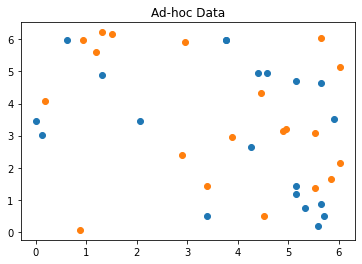

In [77]:
dim = 2
seed = 18021
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    gap=0.3,
    n=dim,
    plot_data=True, one_hot=False, include_sample_total=True)

In [79]:
#backend = Aer.get_backend('aer_simulator')
backend = QuantumInstance(
    Aer.get_backend("aer_simulator"),
    shots=2048,
    seed_simulator=random_seed,
    seed_transpiler=random_seed)

feature_map = ZZFeatureMap(feature_dimension=dim, reps=2, entanglement='linear')
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

qsvc = QSVC(quantum_kernel=kernel)
result = qsvc.fit(train_features, train_labels)
score = qsvc.score(test_features, test_labels)

print('QSVC classification test score is %.2f.' % score)
#print(result.fit)

QSVC classification test score is 1.00.


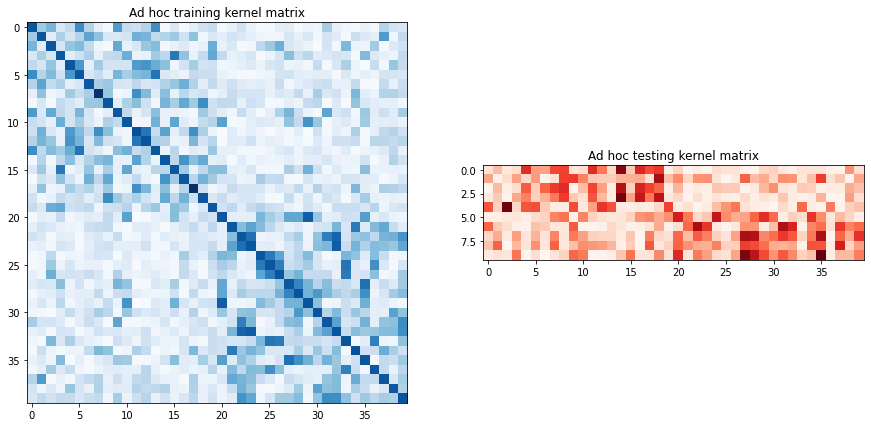

In [84]:
matrix_train = kernel.evaluate(x_vec=train_features)
matrix_test = kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest',
              origin='upper', cmap='Blues')
axs[0].set_title('Ad hoc training kernel matrix')
axs[1].imshow(np.asmatrix(matrix_test),
              interpolation='nearest',
              origin='upper', cmap='Reds')
axs[1].set_title('Ad hoc testing kernel matrix')

plt.show()

In [85]:
labels_test = qsvc.predict(train_features)
from sklearn import metrics
accuracy = metrics.balanced_accuracy_score(y_true=labels_test, y_pred=labels_test)
print('Accuracy is %.2f.' % accuracy)

Accuracy is 1.00.
